# Understanding the Data

### Import the libraries

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.layers import Conv2D
from keras.utils import np_utils

import matplotlib.pyplot as plt

### Load and Analyse the data 

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [3]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [4]:
y_train[0]

5

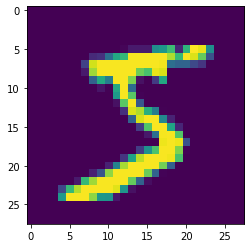

In [5]:
plt.imshow(x_train[0])

In [6]:
x_train = x_train.reshape(60000,28,28,1).astype('float32')
x_test = x_test.reshape(10000,28,28,1).astype('float32')

### Applying One Hot Encoding

In [7]:
number_of_classes = 10
y_train = np_utils.to_categorical(y_train, number_of_classes)
y_test = np_utils.to_categorical(y_test,number_of_classes)

In [8]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

# Model Building

In [9]:
model = Sequential()

model.add(Conv2D(64,(3,3),input_shape=(28,28,1),activation='relu'))
model.add(Conv2D(32,(3,3),activation='relu'))

model.add(Flatten())

model.add(Dense(number_of_classes,activation='softmax'))

In [10]:
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [11]:
model.fit(x_train,y_train, validation_data=(x_test, y_test),epochs=5,batch_size=32)

Epoch 1/5
1875/1875 [==============================] - 74s 39ms/step - loss: 0.2008 - accuracy: 0.9572 - val_loss: 0.0955 - val_accuracy: 0.9707
Epoch 2/5
1875/1875 [==============================] - 72s 39ms/step - loss: 0.0616 - accuracy: 0.9815 - val_loss: 0.0728 - val_accuracy: 0.9777
Epoch 3/5
1875/1875 [==============================] - 72s 38ms/step - loss: 0.0439 - accuracy: 0.9858 - val_loss: 0.0791 - val_accuracy: 0.9765
Epoch 4/5
1875/1875 [==============================] - 72s 38ms/step - loss: 0.0338 - accuracy: 0.9891 - val_loss: 0.0966 - val_accuracy: 0.9777
Epoch 5/5
1875/1875 [==============================] - 72s 38ms/step - loss: 0.0272 - accuracy: 0.9916 - val_loss: 0.1313 - val_accuracy: 0.9741


In [12]:
metrics = model.evaluate(x_test,y_test,verbose=0)
print("Metrics(Test loss & Test Accuracy): ")
print(metrics)

Metrics(Test loss & Test Accuracy): 
[0.13127771019935608, 0.9740999937057495]


In [13]:
prediction = model.predict(x_test[:4])
print(prediction)

1/1 [==============================] - 0s 88ms/step
[[1.7866140e-15 2.1779651e-26 5.6583012e-15 7.7575546e-09 2.2573275e-24
  7.8571742e-17 1.0610020e-26 1.0000000e+00 2.2444774e-13 8.4618257e-11]
 [9.3976674e-11 1.9319776e-12 1.0000000e+00 2.5886165e-20 4.0954622e-19
  3.2093684e-20 6.6418442e-13 2.0045483e-16 4.2256195e-15 7.0734759e-23]
 [3.5647769e-08 9.9949157e-01 3.5150570e-08 1.9105336e-13 4.1529589e-04
  8.1289149e-11 3.5877488e-09 8.0103033e-05 1.3015497e-05 3.7913245e-10]
 [1.0000000e+00 1.7831951e-16 8.3932718e-14 7.9188107e-14 4.6997602e-16
  4.0275159e-16 5.8191341e-09 4.7759431e-14 8.3638722e-13 5.5319900e-09]]


In [14]:
print(np.argmax(prediction,axis=1))
print(y_test[:4])

[7 2 1 0]
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [15]:
model.save('models/mnistCNN.h5')

# Test the Model


In [3]:
from tensorflow.keras.models import load_model
model=load_model(r'models/mnistCNN.h5')
from PIL import Image
import numpy as np
for index in range(4):
    img=Image.open('data/0.jpg').convert("L")
    img=img.resize((28,28))
    im2arr=np.array(img)
    im2arr=im2arr.reshape(1,28,28,1)
    y_pred=model.predict(im2arr)
    print(y_pred)

1/1 [==============================] - 0s 300ms/step
[[0.09589045 0.11138347 0.09472927 0.09706043 0.09614821 0.09726575
  0.09802452 0.0990321  0.104909   0.10555679]]
1/1 [==============================] - 0s 40ms/step
[[0.09589045 0.11138347 0.09472927 0.09706043 0.09614821 0.09726575
  0.09802452 0.0990321  0.104909   0.10555679]]
1/1 [==============================] - 0s 32ms/step
[[0.09589045 0.11138347 0.09472927 0.09706043 0.09614821 0.09726575
  0.09802452 0.0990321  0.104909   0.10555679]]
1/1 [==============================] - 0s 32ms/step
[[0.09589045 0.11138347 0.09472927 0.09706043 0.09614821 0.09726575
  0.09802452 0.0990321  0.104909   0.10555679]]


X_train:(60000, 28, 28)
y_train:(60000,)
X_test:(10000, 28, 28)
y_test:(10000,)


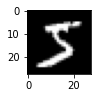

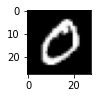

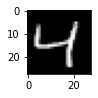

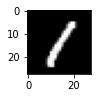

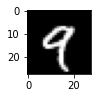

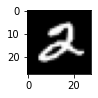

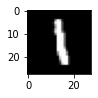

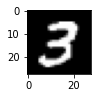

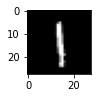

In [4]:
from keras.datasets import mnist
from matplotlib import pyplot
(X_train,y_train),(X_test,y_test)=mnist.load_data()
print('X_train:' +str(X_train.shape))
print('y_train:' +str(y_train.shape))
print('X_test:' +str(X_test.shape))
print('y_test:' +str(y_test.shape))
from matplotlib import pyplot
for i in range(9):
  pyplot.subplot(330+1+i)
  pyplot.imshow(X_train[i],cmap=pyplot.get_cmap('gray'))
  pyplot.show()